In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
df = pd.read_csv('3OEC_current_flow.csv')

In [44]:
from datetime import datetime, timedelta

start_time_11 = datetime(2017, 7, 11, 14, 0, 0)
end_time_11 = datetime(2017, 7, 12, 8, 0, 0)

start_time_13 = datetime(2017, 7, 13, 11, 0, 0)
end_time_13 = datetime(2017, 7, 14, 6, 0, 0)

start_time_15 = datetime(2017, 7, 15, 10, 0, 0)
end_time_15 = datetime(2017, 7, 16, 6, 0, 0)

start_time_16 = datetime(2017, 7, 16, 16, 0, 0)
end_time_16 = datetime(2017, 7, 17, 6, 0, 0)

deployments = {
    "3oec_2017_7_11_12": {"start": start_time_11, "end": end_time_11},
    "3oec_2017_7_13_14": {"start": start_time_13, "end": end_time_13},
    "3oec_2017_7_15_16": {"start": start_time_15, "end": end_time_15},
    "3oec_2017_7_16_17": {"start": start_time_16, "end": end_time_16}
}

date_ranges = []

for deployment_name, deployment_info in deployments.items():
    start_time = deployment_info["start"]
    end_time = deployment_info["end"]
    if deployment_name == "3oec_2017_7_13_14":
        start_time -= timedelta(seconds=0.125)
    print(start_time)

    # Calculate total seconds and number of measurements
    total_seconds = (end_time - start_time).total_seconds() + 0.125
    num_measurements = int(total_seconds * 8)

    # Create DatetimeIndex for the deployment
    date_range = pd.date_range(start=start_time, periods=num_measurements, freq=f'{1000/8}ms')
    print(date_range[0], date_range[-1])
    print(len(date_range))
    date_ranges.append(pd.Series(date_range))

# Concatenate all DatetimeIndexes
complete_index = pd.concat(date_ranges)

# Set the complete index to your DataFrame
df.index = complete_index

2017-07-11 14:00:00
2017-07-11 14:00:00 2017-07-12 08:00:00
518401
2017-07-13 10:59:59.875000
2017-07-13 10:59:59.875000 2017-07-14 06:00:00
547202
2017-07-15 10:00:00
2017-07-15 10:00:00 2017-07-16 06:00:00
576001
2017-07-16 16:00:00
2017-07-16 16:00:00 2017-07-17 06:00:00
403201


In [45]:
df['O2_avg'] = df[['O2_S1', 'O2_S2', 'O2_S3']].mean(axis=1)

In [46]:
o2_avg = df['O2_avg']

In [47]:
o2_avg = o2_avg.resample('15min').mean()

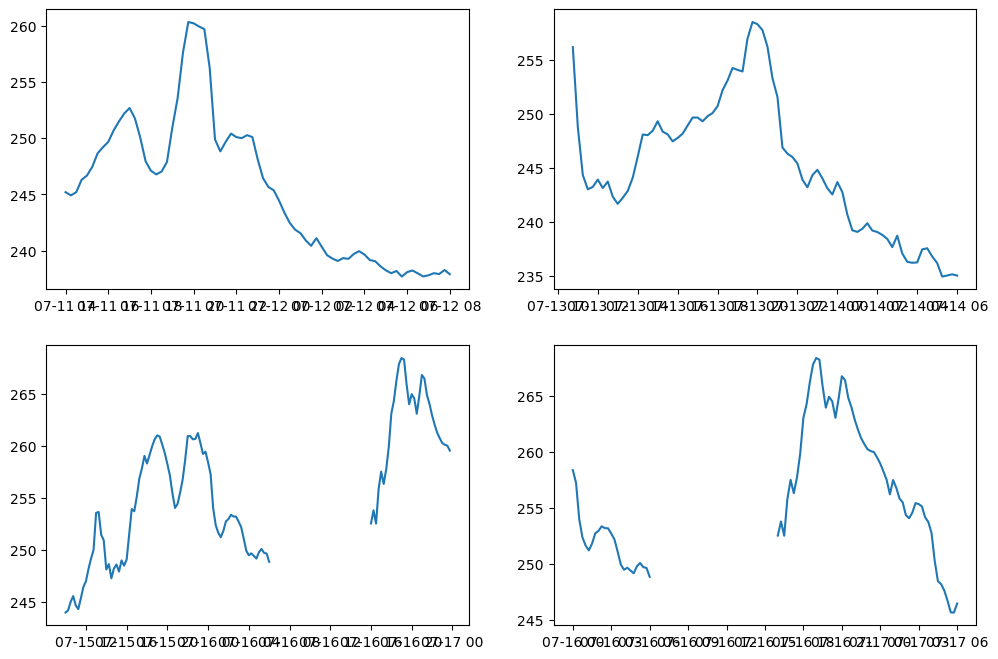

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].plot(o2_avg["2017-07-11":"2017-07-12"])
axes[0,1].plot(o2_avg["2017-07-13":"2017-07-14"])
axes[1,0].plot(o2_avg["2017-07-15":"2017-07-16"])
axes[1,1].plot(o2_avg["2017-07-16":"2017-07-17"])
plt.show()

<Axes: >

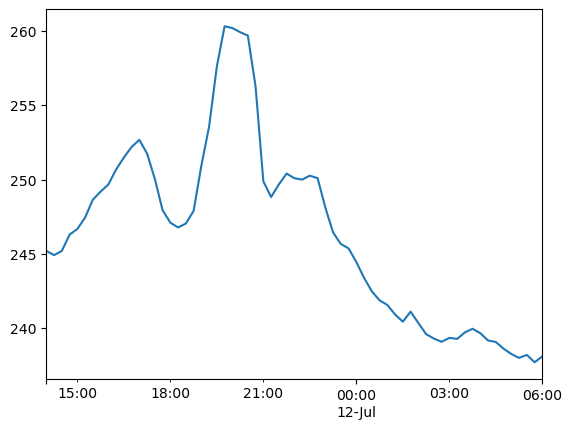

In [49]:
o2_avg["2017-07-11":"2017-07-12 06:00:00"].plot()

<Axes: >

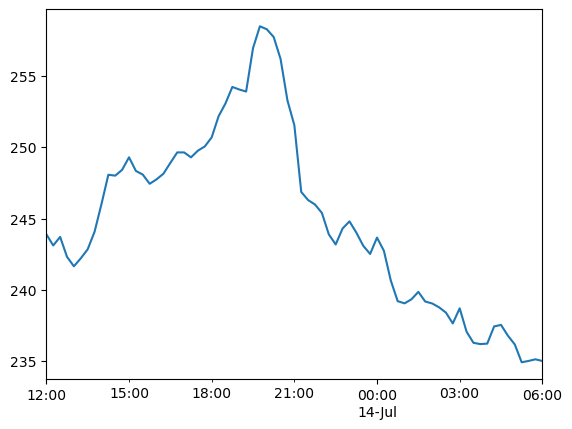

In [50]:
o2_avg["2017-07-13 12:00:00":"2017-07-14 06:00:00"].plot()

<Axes: >

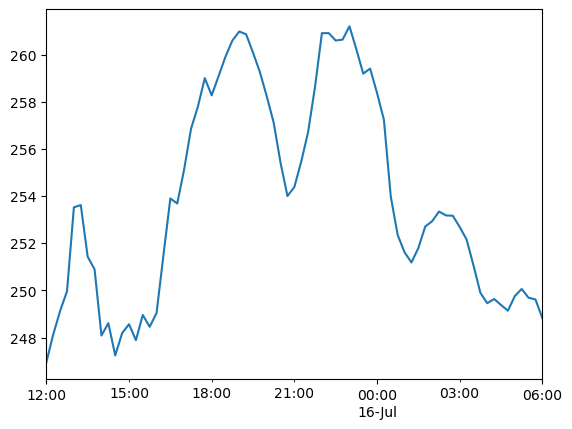

In [51]:
o2_avg["2017-07-15 12:00:00":"2017-07-16 6:00:00"].plot()

<Axes: >

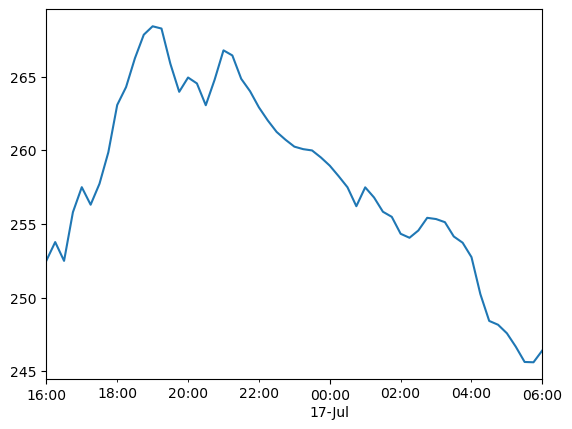

In [52]:
o2_avg["2017-07-16 16:00:00":"2017-07-17"].plot()

In [53]:
data = [o2_avg["2017-07-11":"2017-07-12 06:00:00"], o2_avg["2017-07-13 12:00:00":"2017-07-14 06:00:00"],
        o2_avg["2017-07-15 12:00:00":"2017-07-16 6:00:00"], o2_avg["2017-07-16 16:00:00":"2017-07-17"]]


In [54]:
models = []
for piece in data:
    model = SARIMAX(piece, order=(1, 0, 1), seasonal_order=(1, 0, 1, 96))
    results = model.fit()
    models.append(results)

/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69695D+00    |proj g|=  2.01268D-01


 This problem is unconstrained.



At iterate    5    f=  1.57969D+00    |proj g|=  7.11833D-02

At iterate   10    f=  1.57035D+00    |proj g|=  4.13838D-02

At iterate   15    f=  1.56870D+00    |proj g|=  1.84558D-03

At iterate   20    f=  1.56846D+00    |proj g|=  1.89792D-02

At iterate   25    f=  1.56840D+00    |proj g|=  2.12918D-03

At iterate   30    f=  1.56839D+00    |proj g|=  3.25714D-03

At iterate   35    f=  1.56839D+00    |proj g|=  3.80288D-03

At iterate   40    f=  1.56837D+00    |proj g|=  5.04933D-03

At iterate   45    f=  1.56833D+00    |proj g|=  1.94840D-02


/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.56825D+00    |proj g|=  4.27939D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   4.279D-02   1.568D+00
  F =   1.5682478176754147     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70113D+00    |proj g|=  3.40413D-01

At iterate    5    f=  1.55696D+00    |proj g|=  1.01901D-01

At iterate   10    f=  1.54842D+00    |proj g|=  6.29701D-02

At iterate   15    f=  1.54702D+00    |proj g|=  4.69967D-02

At iterate   20    f=  1.54592D+00    |proj g|=  4.32582D-02

At iterate   25    f=  1.54574D+00    |proj g|=  1.75869D-02

At iterate   30    f=  1.54572D+00    |proj g|=  2.70635D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58983D+00    |proj g|=  2.45011D-02

At iterate    5    f=  1.58540D+00    |proj g|=  9.73936D-03

At iterate   10    f=  1.58441D+00    |proj g|=  2.63016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     15      1     0     0   3.990D-06   1.584D+00
  F =   1.5844085951254501     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85338D+00    |proj g|=  6.00086D-01

At iterate    5    f=  1.67725D+00    |proj g|=  9.22272D-02

At iterate   10    f=  1.66755D+00    |proj g|=  3.38724D-02

At iterate   15    f=  1.66674D+00    |proj g|=  5.34577D-02

At iterate   20    f=  1.66634D+00    |proj g|=  1.55145D-02

At iterate   25    f=  1.66628D+00    |proj g|=  7.40106D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     44      1     0     0   2.917D-04   1.666D+00
  F =   1.6662825323756894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [55]:
forecasts = [model.forecast(steps=100) for model in models]
time_period = pd.date_range("2017-07-11", "2017-07-17")
preds = pd.Series(forecasts)


In [56]:
preds[0]

2017-07-12 06:15:00    238.739514
2017-07-12 06:30:00    238.826242
2017-07-12 06:45:00    238.913018
2017-07-12 07:00:00    238.999842
2017-07-12 07:15:00    239.086713
                          ...    
2017-07-13 06:00:00    234.473901
2017-07-13 06:15:00    235.099046
2017-07-13 06:30:00    235.183804
2017-07-13 06:45:00    235.268609
2017-07-13 07:00:00    235.353461
Freq: 15min, Name: predicted_mean, Length: 100, dtype: float64

<Axes: >

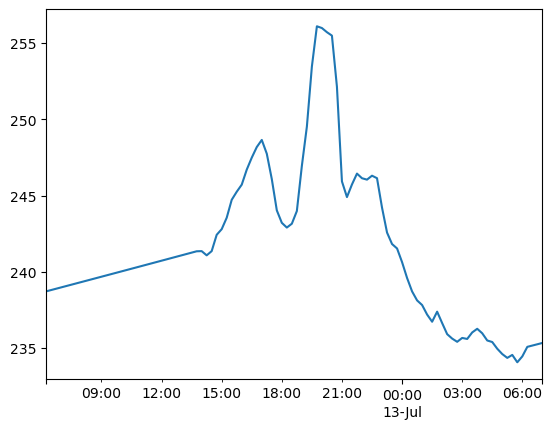

In [57]:
preds[0].plot()

<Axes: >

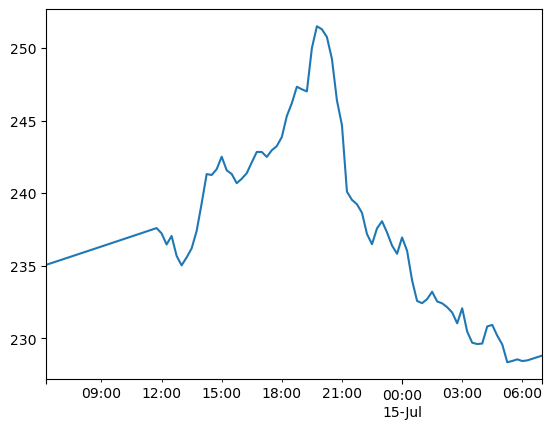

In [58]:
preds[1].plot()

<Axes: >

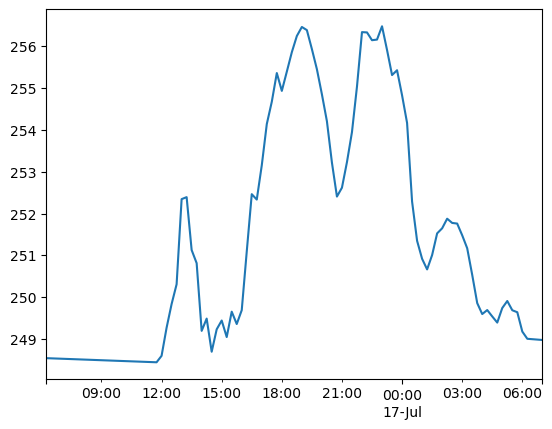

In [59]:
preds[2].plot()

<Axes: >

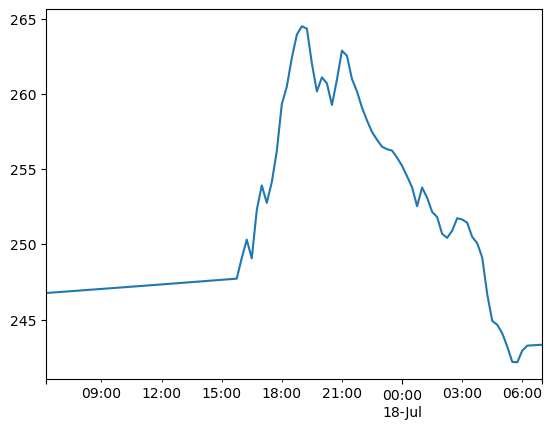

In [60]:
preds[3].plot()

In [61]:
combined_forecast = (preds[0]+ preds[1] + preds[2] + preds[3]) / 4

In [62]:
avg_pred = (preds[0].values + preds[1].values + preds[2].values + preds[3].values)/4

In [63]:
# Create datetime index
dt_index = pd.date_range(start="2017-07-17 06:00", periods=100, freq='15min')

# Create a pandas Series with this index
time_series_pred = pd.Series(data=avg_pred, index=dt_index)


In [64]:
# data = [o2_avg["2017-07-11":"2017-07-12 06:00:00"], o2_avg["2017-07-13 12:00:00":"2017-07-14 06:00:00"],
        # o2_avg["2017-07-15 12:00:00":"2017-07-16 6:00:00"], o2_avg["2017-07-16 16:00:00":"2017-07-17"]]

In [65]:
dep_1_val = o2_avg["2017-07-11 06:00":"2017-07-12 06:00:00"].values
dep_2_val = o2_avg["2017-07-13 12:00:00":"2017-07-14 06:00:00"].values
dep_3_val = o2_avg["2017-07-15 12:00:00":"2017-07-16 6:00:00"].values
dep_4_val = o2_avg["2017-07-16 16:00:00":"2017-07-17"].values

In [66]:
o2_avg["2017-07-13 12:00":"2017-07-14 06:00:00"].values.shape

(73,)

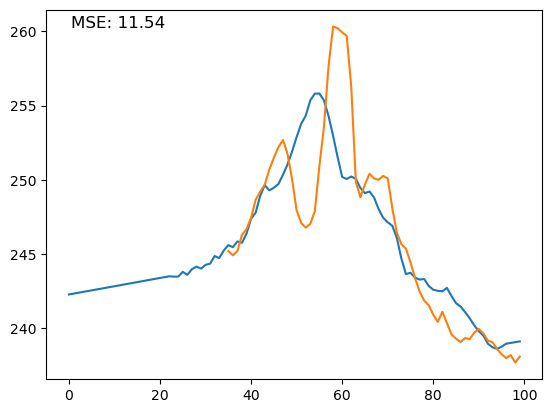

In [67]:
x1 = np.arange(len(dep_1_val))
x1 = x1 + 100-len(dep_1_val)
plt.plot(avg_pred)
plt.plot(x1, dep_1_val)
mse = np.mean((avg_pred[x1]-dep_1_val)**2)
plt.text(0.05, 0.95, f'MSE: {mse:.2f}',
         transform=plt.gca().transAxes, fontsize=12)
plt.show()


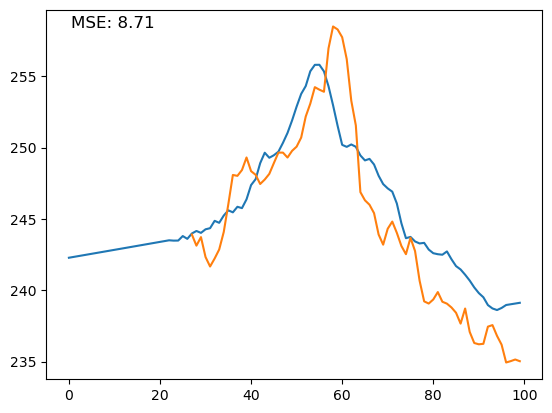

In [68]:
x1 = np.arange(len(dep_2_val))
x1 = x1 + 100-len(dep_2_val)
plt.plot(avg_pred)
plt.plot(x1, dep_2_val)
mse = np.mean((avg_pred[x1]-dep_2_val)**2)
plt.text(0.05, 0.95, f'MSE: {mse:.2f}',
         transform=plt.gca().transAxes, fontsize=12)
plt.show()

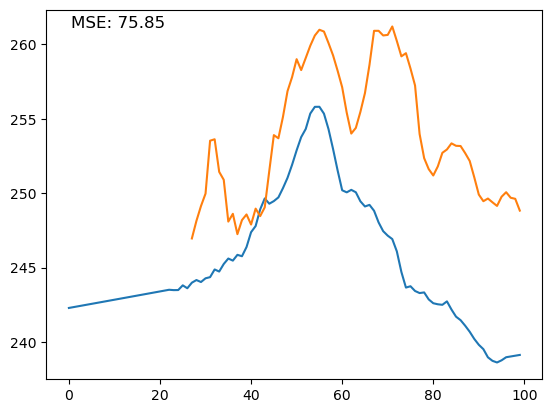

In [69]:
x1 = np.arange(len(dep_3_val))
x1 = x1 + 100-len(dep_3_val)
plt.plot(avg_pred)
plt.plot(x1, dep_3_val)
mse = np.mean((avg_pred[x1]-dep_3_val)**2)
plt.text(0.05, 0.95, f'MSE: {mse:.2f}',
         transform=plt.gca().transAxes, fontsize=12)
plt.show()

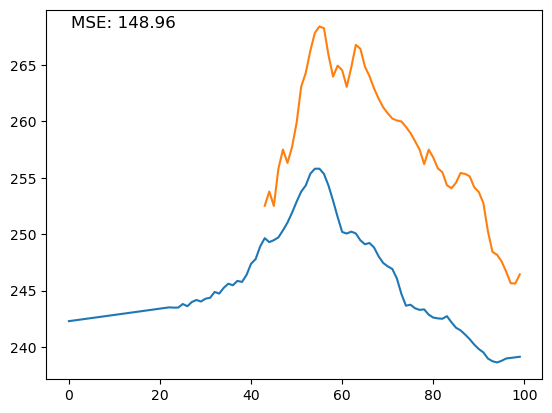

In [70]:
x1 = np.arange(len(dep_4_val))
x1 = x1 + 100-len(dep_4_val)
plt.plot(avg_pred)
plt.plot(x1, dep_4_val)
mse = np.mean((avg_pred[x1]-dep_4_val)**2)
plt.text(0.05, 0.95, f'MSE: {mse:.2f}',
         transform=plt.gca().transAxes, fontsize=12)
plt.show()

<Axes: >

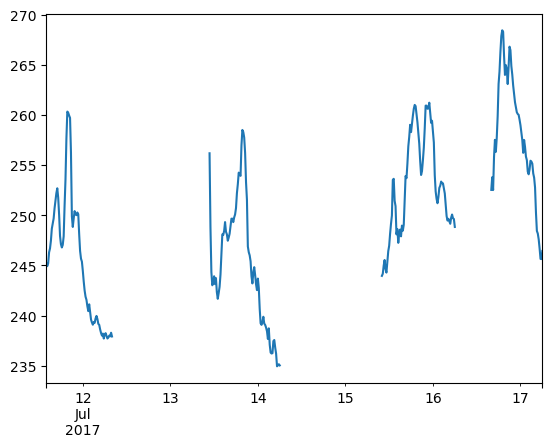

In [71]:
o2_avg.plot()

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()
o2_filled = o2_avg.fillna(method='ffill')
o2_avg_norm = scaler.fit_transform(o2_filled.values.reshape(-1, 1))

/var/folders/d6/tw5j0wsn1m11p_w84_70527m0000gn/T/ipykernel_77436/2239650287.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  o2_filled = o2_avg.fillna(method='ffill')


In [74]:
o2_avg_norm

array([[0.30643857],
       [0.29797823],
       [0.30643857],
       [0.3392224 ],
       [0.35054432],
       [0.37349922],
       [0.40951788],
       [0.42569207],
       [0.43993779],
       [0.47010886],
       [0.49418351],
       [0.51545879],
       [0.52976672],
       [0.50208398],
       [0.45107309],
       [0.38824261],
       [0.36317263],
       [0.35365474],
       [0.36136858],
       [0.38681182],
       [0.47763608],
       [0.55645412],
       [0.67720062],
       [0.75807154],
       [0.75452566],
       [0.74618974],
       [0.7392846 ],
       [0.63651633],
       [0.44628305],
       [0.4148056 ],
       [0.44012442],
       [0.46195956],
       [0.4526283 ],
       [0.44982893],
       [0.45772939],
       [0.45269051],
       [0.39353033],
       [0.34345257],
       [0.32037325],
       [0.31147745],
       [0.28398134],
       [0.25213064],
       [0.22513219],
       [0.20702955],
       [0.1977605 ],
       [0.17860031],
       [0.16416796],
       [0.184

In [75]:
def create_sequences(data, window_size, prediction_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size - prediction_size):
        sequences.append(data[i:i+window_size])
        targets.append(data[i+window_size:i+window_size+prediction_size])
    return np.array(sequences), np.array(targets)

In [76]:
window_size = 48  # 12 hours of historical data (48 * 15 mins = 12 hours)
prediction_size = 24  # 6 hours of future prediction (6 hours = 24 * 15 mins)
batch_size = 32
epochs = 20

In [77]:
window_size = 192  # Optional: Use 24 hours of historical data (96 * 15 mins = 24 hours)
prediction_size = 96  # Predict the next 24 hours (24 hours = 96 * 15 mins)
batch_size = 32
epochs = 100

In [78]:
# look_back = 10 # Number of previous time steps to use as input
X, Y = create_sequences(o2_avg_norm, window_size, prediction_size)

In [79]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
X_train.shape

(205, 192, 1)

In [80]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [81]:
import tensorflow as tf

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(window_size, 1)),
    tf.keras.layers.GRU(128, return_sequences=True, dropout=0.2),  # First LSTM layer
    tf.keras.layers.GRU(64, return_sequences=False, dropout=0.2),  # Second LSTM layer
    tf.keras.layers.Dense(prediction_size)  # Predict future values
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [83]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [84]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.1237 - val_loss: 0.2710
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1029 - val_loss: 0.1563
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0782 - val_loss: 0.1322
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0713 - val_loss: 0.2000
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0654 - val_loss: 0.2083
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0607 - val_loss: 0.1944
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0601 - val_loss: 0.1753
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0574 - val_loss: 0.2164
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0580 - val_loss: 0.2028
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0559 - val_loss: 0.2586
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0537 - val_loss: 0.2959
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0570 - val_l

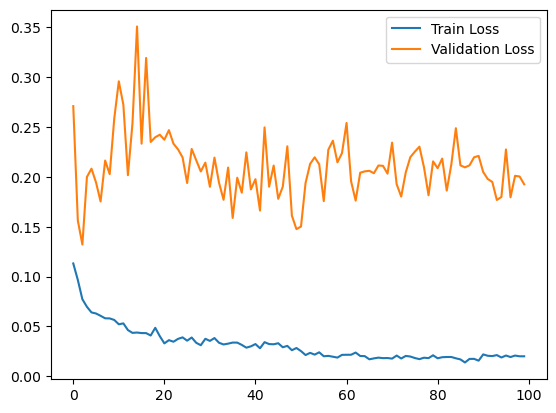

In [85]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [86]:
# Predict the future
last_window = o2_avg_norm[-window_size:]  # Get the last available window
last_window = np.reshape(last_window, (1, window_size, 1))  # Reshape for prediction

# Predict the next 6 hours (24 steps)
predicted_future = model.predict(last_window)

# Rescale the predictions back to original scale
predicted_future_rescaled = scaler.inverse_transform(predicted_future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


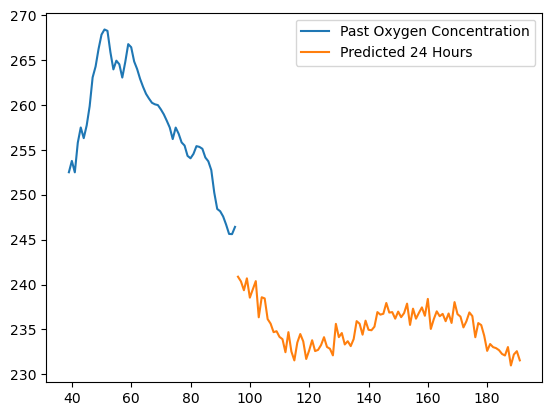

In [87]:
plt.plot(range(96), o2_avg[-96:], label="Past Oxygen Concentration")
plt.plot(range(96, 192), predicted_future_rescaled.flatten(), label="Predicted 24 Hours")
plt.legend()
plt.show()

In [88]:
train_predictions = model.predict(X_train)
train_predictions.shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(205, 96)

In [89]:
Y_train.shape

(205, 96, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


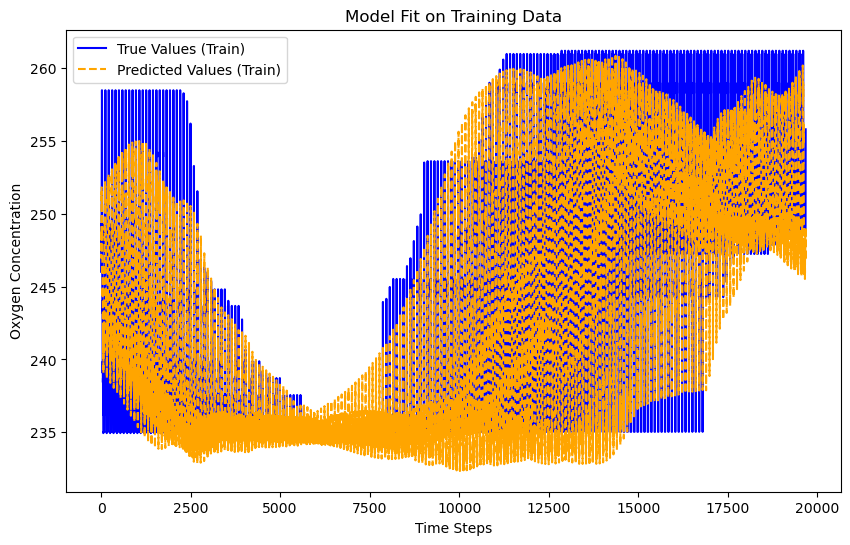

In [90]:
# Predict on the training data
train_predictions = model.predict(X_train)

# Rescale the predictions and the actual values to their original scale
train_predictions_rescaled = scaler.inverse_transform(train_predictions)
y_train_rescaled = scaler.inverse_transform(np.squeeze(Y_train))

# Plot the true values vs. predicted values on the training set
plt.figure(figsize=(10, 6))
plt.plot(y_train_rescaled.flatten(), label="True Values (Train)", color='blue')
plt.plot(train_predictions_rescaled.flatten(), label="Predicted Values (Train)", color='orange', linestyle='dashed')
plt.title("Model Fit on Training Data")
plt.xlabel("Time Steps")
plt.ylabel("Oxygen Concentration")
plt.legend()
plt.show()


In [91]:
# Define the window size for the moving average (e.g., 4 for a 1-hour moving average for 15-minute intervals)
window_size_ma = 4  # Moving average over 1 hour

# Calculate the moving average and shift to align with the current time step
df['moving_avg'] = df['O2_avg'].rolling(window=window_size_ma).mean()

# Since the first few values will be NaN due to the moving average window, drop them
df.dropna(inplace=True)

# Inspect the data with the new feature
print(df.head())


                                deployment         t  t_increase     Vx  \
2017-07-11 14:00:00.375  3oec_2017_7_11_12  38.00012       0.375 -6.042   
2017-07-11 14:00:00.500  3oec_2017_7_11_12  38.00015       0.500 -5.016   
2017-07-11 14:00:00.625  3oec_2017_7_11_12  38.00019       0.625 -5.661   
2017-07-11 14:00:00.750  3oec_2017_7_11_12  38.00022       0.750 -6.171   
2017-07-11 14:00:00.875  3oec_2017_7_11_12  38.00026       0.875 -4.543   

                            Vy     Vz     P       O2_S1       O2_S2  \
2017-07-11 14:00:00.375 -6.884 -0.580  83.3  244.394133  243.304755   
2017-07-11 14:00:00.500 -6.165 -0.421  83.3  244.639132  241.733755   
2017-07-11 14:00:00.625 -5.723 -0.427  82.9  243.355132  243.964755   
2017-07-11 14:00:00.750 -4.199 -0.391  83.1  242.886133  243.150755   
2017-07-11 14:00:00.875 -2.977 -0.373  83.0  243.105132  242.459755   

                              O2_S3      O2_avg  moving_avg  
2017-07-11 14:00:00.375  243.767714  243.822200  244.361700 

In [92]:
data = o2_avg.to_frame()

# Calculate the rolling average with a specified window size (e.g., 4 for 1-hour rolling avg on 15-minute data)
window_size_ma = 4   # Rolling over 4 periods, since each point represents 15 minutes
data['rolling_avg'] = data['O2_avg'].rolling(window=window_size_ma).mean()

# Display the updated DataFrame
print(data.head())

                         O2_avg  rolling_avg
2017-07-11 14:00:00  245.200000          NaN
2017-07-11 14:15:00  244.916667          NaN
2017-07-11 14:30:00  245.200000          NaN
2017-07-11 14:45:00  246.297917   245.403646
2017-07-11 15:00:00  246.677083   245.772917


In [93]:
data = data.iloc[3:].reset_index(drop=True)

In [94]:
data = data.dropna()

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
window_size = 48  #  12 hours of historical data (48 * 15 mins = 12 hours)
prediction_size = 24  # Predict the next 6 hours (24 hours = 24 * 15 mins)
batch_size = 32
epochs = 100

In [97]:
features = data[['O2_avg', 'rolling_avg']].values

# Normalize each feature separately
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Function to create sequences for time series prediction
def create_multivariate_sequences(data, window_size, prediction_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size - prediction_size):
        sequences.append(data[i:i+window_size])
        targets.append(data[i+window_size:i+window_size+prediction_size, 0])  # Target is still 'o2_avg'
    return np.array(sequences), np.array(targets)

# Create sequences (X will now contain both features, y is still only the 'o2_avg')
X, y = create_multivariate_sequences(features_scaled, window_size, prediction_size)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape X to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))  # Now we have 2 features
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

In [98]:
y_train

array([[0.12379471, 0.13157076, 0.12951788, ..., 0.08875227, 0.24111975,
        0.24777605],
       [0.13157076, 0.12951788, 0.14258165, ..., 0.24111975, 0.24777605,
        0.26793157],
       [0.12951788, 0.14258165, 0.14992224, ..., 0.24777605, 0.26793157,
        0.24460342],
       ...,
       [0.5444479 , 0.53026439, 0.51446345, ..., 0.93517885, 0.98289269,
        1.        ],
       [0.53026439, 0.51446345, 0.48174184, ..., 0.98289269, 1.        ,
        0.99539658],
       [0.51446345, 0.48174184, 0.44696734, ..., 1.        , 0.99539658,
        0.92416796]])

In [99]:
# Build the RNN model to accept 2 input features
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(window_size, 2)),  # Input has 2 features now
    tf.keras.layers.LSTM(128, return_sequences=True),  # First LSTM layer
    tf.keras.layers.LSTM(64, return_sequences=False),  # Second LSTM layer
    tf.keras.layers.Dense(prediction_size)  # Predict future values
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/100


/Users/ramanzatsarenko/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2046 - val_loss: 0.2502
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0868 - val_loss: 0.0898
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0573 - val_loss: 0.1314
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0488 - val_loss: 0.0915
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0484 - val_loss: 0.1101
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0437 - val_loss: 0.0981
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0417 - val_loss: 0.0971
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0414 - val_loss: 0.1125
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0365 - val_loss: 0.0795
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0370 - val_loss: 0.0995
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0313 - val_loss: 0.0790
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0301 - val_loss: 0.0774
E

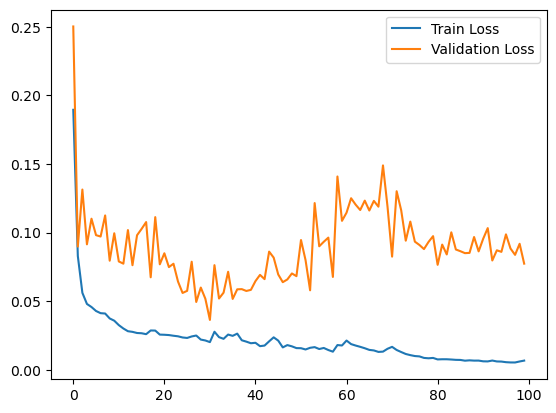

In [100]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [101]:
import numpy as np
import matplotlib.pyplot as plt

last_window = features_scaled[-window_size:, :]  # Get the last available window with two features
last_window = np.reshape(last_window, (1, window_size, 2))  # Reshape for prediction (1 sample, window_size steps, 2 features)

predicted_future = model.predict(last_window)
dummy_feature = np.zeros_like(predicted_future)
x = np.vstack((predicted_future, dummy_feature)).transpose()
x.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


(24, 2)

In [102]:
features_scaled.shape

(277, 2)

In [103]:
predicted_future

array([[0.39236805, 0.41375375, 0.34948573, 0.37910515, 0.36248145,
        0.38217467, 0.3331285 , 0.37352902, 0.2892444 , 0.33912954,
        0.4661978 , 0.45892933, 0.39996773, 0.4879974 , 0.48111883,
        0.57266027, 0.63117045, 0.7192663 , 0.73475593, 0.7510985 ,
        0.875844  , 0.9737506 , 0.8905793 , 0.8537459 ]], dtype=float32)

In [104]:
dummy_feature

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


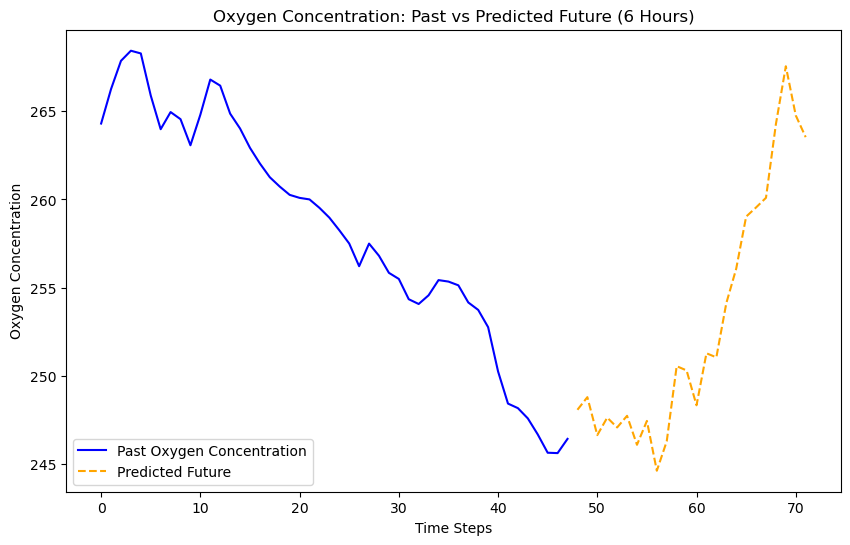

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the last window of data for prediction with two features
last_window = features_scaled[-window_size:, :]  # Get the last available window with two features
last_window = np.reshape(last_window, (1, window_size, 2))  # Reshape for prediction (1 sample, window_size steps, 2 features)

# Step 2: Predict the next 6 hours (24 steps)
predicted_future = model.predict(last_window)

# # Step 3: Rescale the predictions back to the original scale
# # Since we only care about the 'o2_avg' predictions (first feature), rescale the first feature only
dummy_feature = np.zeros_like(predicted_future)
predicted_future_rescaled = scaler.inverse_transform(np.vstack((predicted_future, dummy_feature)).T)[:, 0]

# Step 4: Prepare data for plotting
# Get the past values (real data) for context, using only the 'o2_avg' column (first feature)
past_values = features_scaled[-window_size:, 0]  # Extract the first feature ('o2_avg') for the past data
past_values_rescaled = scaler.inverse_transform(np.vstack((past_values, np.zeros_like(past_values))).T)[:, 0]

# Step 5: Plot the past and predicted future values
plt.figure(figsize=(10, 6))

# Plot the past values (last 12 hours of actual oxygen concentration data)
plt.plot(range(window_size), past_values_rescaled.flatten(), label="Past Oxygen Concentration", color='blue')

# Plot the predicted future values (next 6 hours of predictions)
plt.plot(range(window_size, window_size + 24), predicted_future_rescaled.flatten(), label="Predicted Future", color='orange', linestyle='dashed')

plt.title("Oxygen Concentration: Past vs Predicted Future (6 Hours)")
plt.xlabel("Time Steps")
plt.ylabel("Oxygen Concentration")
plt.legend()
plt.show()


In [106]:
predicted_future

array([[0.39236805, 0.41375375, 0.34948573, 0.37910515, 0.36248145,
        0.38217467, 0.3331285 , 0.37352902, 0.2892444 , 0.33912954,
        0.4661978 , 0.45892933, 0.39996773, 0.4879974 , 0.48111883,
        0.57266027, 0.63117045, 0.7192663 , 0.73475593, 0.7510985 ,
        0.875844  , 0.9737506 , 0.8905793 , 0.8537459 ]], dtype=float32)